<a href="https://colab.research.google.com/github/caseynv/.github/blob/main/Allstates_NGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install GDAL
!pip install seaborn
!pip install geoplot
!pip install matplotlib
!pip install tifffile
!pip install geojson -q
!pip install geopandas -q

import os, zipfile, glob, io, requests

import geopandas as gpd
import geojson
from shapely.geometry import Polygon

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
url0 = "https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/NGA/NGA_ALL_states.json"

a=requests.get(url0).content

df_cbo = gpd.read_file(io.StringIO(a.decode('utf-8')))
df_cbo

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,NGA,NG-AB,Abia,,Abia,,administrative,4,Q320852,en:Abia State,2019-09-18T23:02:02,"POLYGON ((7.14043 4.90063, 7.14375 4.89561, 7...."
1,NGA,NG-AD,Adamawa,,Adamawa,,administrative,4,Q337514,en:Adamawa State,2019-02-26T10:52:47,"POLYGON ((11.34152 8.01867, 11.34614 8.01523, ..."
2,NGA,NG-AK,Akwa Ibom,,Akwa Ibom,,administrative,4,Q424388,en:Akwa Ibom State,2019-09-19T22:03:02,"MULTIPOLYGON (((8.34338 4.60775, 8.34325 4.607..."
3,NGA,NG-AN,Anambra,,Anambra,,administrative,4,Q117714,en:Anambra State,2019-02-26T10:52:47,"POLYGON ((6.63362 5.73004, 6.65089 5.72511, 6...."
4,NGA,NG-BA,Bauchi,,Bauchi,,administrative,4,Q503936,en:Bauchi State,2019-02-26T10:52:47,"POLYGON ((8.74922 10.44070, 8.75362 10.43965, ..."
5,NGA,NG-BY,Bayelsa,,Bayelsa,,administrative,4,Q532153,en:Bayelsa State,2019-08-24T22:02:02,"MULTIPOLYGON (((5.44317 4.96434, 5.44257 4.964..."
6,NGA,NG-BE,Benue,,Benue,,administrative,4,Q429908,en:Benue State,2019-02-26T10:52:47,"POLYGON ((7.53051 7.03228, 7.53827 7.02016, 7...."
7,NGA,NG-BO,Borno,,Borno,,administrative,4,Q130626,en:Borno State,2019-05-28T22:01:04,"POLYGON ((11.52934 10.31362, 11.52981 10.31403..."
8,NGA,NG-CR,Cross River,,Cross River,,administrative,4,Q739676,en:Cross River State,2019-07-14T23:25:02,"MULTIPOLYGON (((8.14156 4.95736, 8.14143 4.957..."
9,NGA,NG-DE,Delta,,Delta,,administrative,4,Q503910,en:Delta State,2019-08-24T22:02:02,"MULTIPOLYGON (((5.37315 5.58541, 5.36773 5.584..."


In [31]:
url2 = "https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byStateWSR/NGA/NGA_ALL_states_WSR.json"

s=requests.get(url2).content

cwsr = gpd.read_file(io.StringIO(s.decode('utf-8')))
cwsr

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,NGA,NG-AB,Abia,AC,23,Acrisol,4,"POLYGON ((7.54719 5.99494, 7.53338 6.01098, 7...."
1,NGA,NG-AB,Abia,FL,20,Fluvisol,4,"MULTIPOLYGON (((7.70315 5.46351, 7.61329 5.481..."
2,NGA,NG-AD,Adamawa,LX,6,Lixisol,4,"POLYGON ((13.72955 10.92221, 13.71841 10.92639..."
3,NGA,NG-AD,Adamawa,VR,5,Vertisol,4,"POLYGON ((12.95992 9.43936, 12.95996 9.43937, ..."
4,NGA,NG-AK,Akwa Ibom,AC,23,Acrisol,4,"MULTIPOLYGON (((7.79190 5.44085, 7.78878 5.444..."
...,...,...,...,...,...,...,...,...
68,NGA,NG-YO,Yobe,AR,3,Arenosol,4,"MULTIPOLYGON (((10.26798 12.95038, 10.37906 13..."
69,NGA,NG-YO,Yobe,GL,7,Gleysol,4,"POLYGON ((12.42990 13.07449, 12.42976 13.07454..."
70,NGA,NG-YO,Yobe,LX,6,Lixisol,4,"POLYGON ((12.24176 11.39450, 12.22272 11.40334..."
71,NGA,NG-ZA,Zamfara,AR,3,Arenosol,4,"MULTIPOLYGON (((6.82012 13.14342, 6.74346 13.1..."


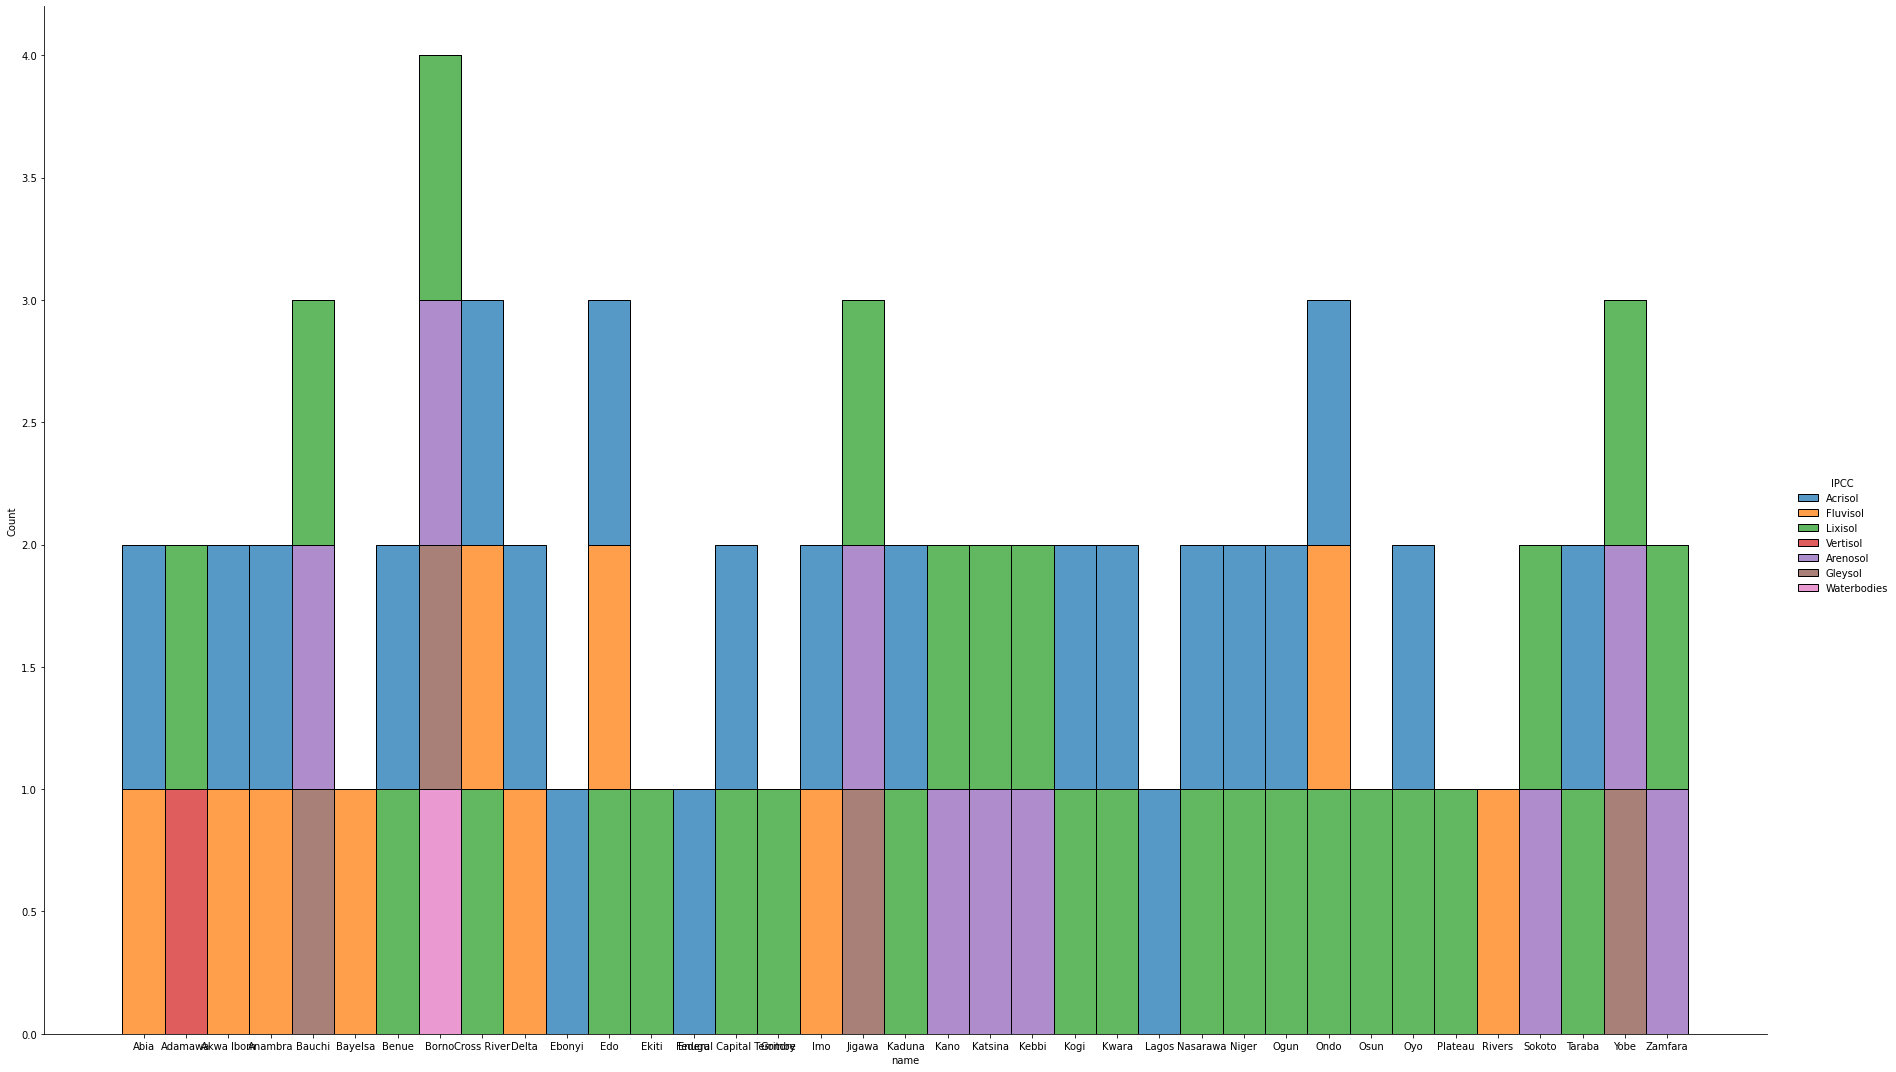

In [94]:

ax = sns.displot(df_cwsr, x='name', kind='hist', hue='IPCC', multiple='stack', height=15, aspect=25/15)



In [98]:
url4 = "https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/NGA/NGA_ALL_states_GEZ.json"
f=requests.get(url4).content

data = gpd.read_file(io.StringIO(f.decode('utf-8')))
data

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,NGA,NG-AD,Adamawa,Tropical dry forest,13,TAwb,4,"POLYGON ((13.59259 10.94944, 13.58541 10.94946..."
1,NGA,NG-BA,Bauchi,Tropical dry forest,13,TAwb,4,"POLYGON ((10.93098 11.55680, 10.91217 11.55744..."
2,NGA,NG-BO,Borno,Tropical dry forest,13,TAwb,4,"POLYGON ((14.47848 11.43935, 14.44727 11.45028..."
3,NGA,NG-GO,Gombe,Tropical dry forest,13,TAwb,4,"POLYGON ((11.58331 10.59387, 11.57290 10.59247..."
4,NGA,NG-JI,Jigawa,Tropical dry forest,13,TAwb,4,"POLYGON ((9.67194 11.78964, 9.62997 11.80084, ..."
...,...,...,...,...,...,...,...,...
67,NGA,NG-KE,Kebbi,Tropical shrubland,14,TBSh,4,"POLYGON ((4.73138 12.68190, 4.73086 12.69110, ..."
68,NGA,NG-SO,Sokoto,Tropical shrubland,14,TBSh,4,"POLYGON ((6.82012 13.14342, 6.79824 13.17816, ..."
69,NGA,NG-YO,Yobe,Tropical shrubland,14,TBSh,4,"POLYGON ((12.42990 13.07449, 12.42976 13.07454..."
70,NGA,NG-ZA,Zamfara,Tropical shrubland,14,TBSh,4,"POLYGON ((6.82012 13.14342, 6.74346 13.11847, ..."


In [100]:
cmr = data.groupby(['name', 'gez_name'])['gez_code'].sum().unstack().fillna(0)
cmr

gez_name,Tropical dry forest,Tropical moist forest,Tropical mountain system,Tropical rainforest,Tropical shrubland,Water
name,,,,,,
Abia,0.0,0.0,0.0,11.0,0.0,0.0
Adamawa,13.0,12.0,16.0,0.0,0.0,0.0
Akwa Ibom,0.0,0.0,0.0,11.0,0.0,0.0
Anambra,0.0,0.0,0.0,11.0,0.0,0.0
Bauchi,13.0,12.0,16.0,0.0,14.0,0.0
Bayelsa,0.0,0.0,0.0,11.0,0.0,0.0
Benue,0.0,12.0,0.0,11.0,0.0,0.0
Borno,13.0,0.0,16.0,0.0,14.0,90.0
Cross River,0.0,12.0,0.0,11.0,0.0,0.0


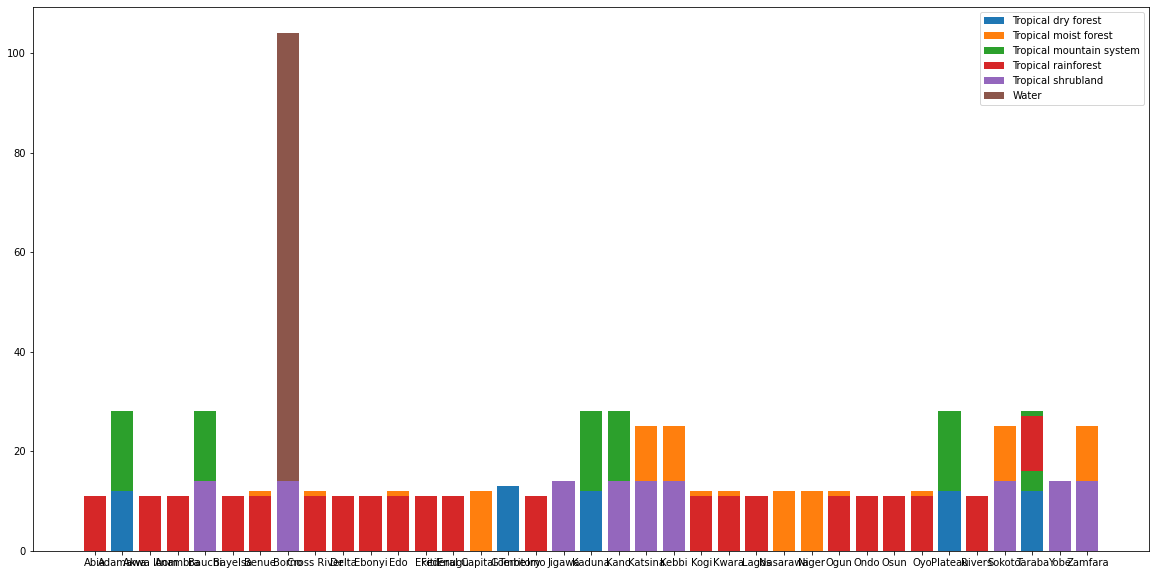

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.bar(cmr.index, cmr['Tropical dry forest'], label='Tropical dry forest')
ax.bar(cmr.index, cmr['Tropical moist forest'], bottom=cmr['Tropical dry forest'], 
       label='Tropical moist forest')
ax.bar(cmr.index, cmr['Tropical mountain system'], bottom=cmr['Tropical moist forest'], 
       label='Tropical mountain system')
ax.bar(cmr.index, cmr['Tropical rainforest'], bottom=cmr['Tropical mountain system'], 
       label='Tropical rainforest')
ax.bar(cmr.index, cmr['Tropical shrubland'], bottom=cmr['Tropical rainforest'], 
       label='Tropical shrubland')
ax.bar(cmr.index, cmr['Water'], bottom=cmr['Tropical shrubland'], 
       label='Water')

ax.legend()